# Bagging

Vamos a utilizar el siguiente dataset: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

Las siguientes celdas lo descargan e importan:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from f_func import fimpovar

In [3]:
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1X0MT5YFVOduVogJ9cZKjCJ7fs-OdVuAT' -O weather.csv

In [4]:
df = pd.read_csv('weatherAUS.csv')

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Vamos a descartar las columnas:

- Sunshine          
- Evaporation       
- Cloud3pm          
- Cloud9am  
- Location
- Date       
- WindGustDir
- WindDir9am 

In [6]:
#COMPLETAR
to_drop = ['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','Date', 'WindGustDir', 'WindDir9am']
df = df.drop(columns=to_drop)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,44.0,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,46.0,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,24.0,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,41.0,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [7]:
df.shape

(145460, 15)

Descartar todas las filas que tengan nulos:

In [8]:
#COMPLETAR
df.isna().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustSpeed    10263
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(119016, 15)

Separamos en X e y. Nuestro objetivo es predecir si va a llover mañana.

In [11]:
#COMPLETAR
X = df.drop("RainTomorrow", axis=1).copy()
y = df.RainTomorrow.copy()

Aplicamos train test split. El set de test tendrá un 20% de los datos con un random state de 42 y stratify.

In [12]:
#COMPLETAR
y.value_counts(normalize=True)*100

RainTomorrow
No     78.150837
Yes    21.849163
Name: proportion, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Aplicar one hot encoder a las variables categóricas.

Recuerden hacer fit en train y luego en test solo transform.

In [15]:
#COMPLETAR
X_train

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
140197,17.6,30.3,0.0,31.0,NW,15.0,13.0,59.0,24.0,1014.0,1010.1,21.3,29.5,No
138387,-0.6,18.3,0.0,28.0,E,0.0,9.0,51.0,21.0,1026.8,1022.0,7.7,17.6,No
27191,19.8,27.6,0.0,33.0,ENE,15.0,13.0,57.0,40.0,1019.8,1017.4,21.5,27.2,No
87705,22.6,29.7,1.4,41.0,SE,24.0,28.0,73.0,65.0,1011.9,1009.4,25.9,28.8,Yes
113270,12.8,18.7,0.4,50.0,NW,22.0,28.0,78.0,71.0,1018.6,1016.5,16.7,18.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137106,10.9,25.6,19.8,44.0,SE,17.0,26.0,78.0,29.0,1018.0,1013.4,14.3,24.9,Yes
58276,7.7,27.6,0.0,43.0,NW,9.0,28.0,38.0,16.0,1015.4,1010.4,17.7,27.1,No
47721,7.9,29.3,0.0,33.0,NNE,7.0,11.0,68.0,33.0,1021.1,1016.5,17.3,27.6,No
84932,21.9,29.6,40.0,33.0,ENE,13.0,17.0,70.0,70.0,1010.6,1009.6,27.7,28.2,Yes


In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
ohe = OneHotEncoder(sparse_output=False).fit(X_train[['WindDir3pm', 'RainToday']])

#Train

encoded = ohe.transform(X_train[['WindDir3pm', 'RainToday']])
encoded_df = pd.DataFrame(columns=ohe.get_feature_names_out(), data= encoded, index=X_train.index)

X_train = pd.concat([X_train, encoded_df],  axis='columns')

#Test

encoded_test = ohe.transform(X_test[["WindDir3pm", "RainToday"]])
encoded_test_df = pd.DataFrame(columns=ohe.get_feature_names_out(), data= encoded_test, index=X_test.index)

X_test = pd.concat([X_test, encoded_test_df],  axis='columns')



Dropear las columnas originales:

In [18]:
#COMPLETAR
X_train = X_train.drop(["WindDir3pm", "RainToday"], axis=1)
X_test = X_test.drop(["WindDir3pm", "RainToday"], axis=1)


Llevar el target a una variable numérica:

- 1 si va a llover mañana
- 0 si no va a llover mañana

In [19]:
#COMPLETAR
reglas = {'Yes': 1, 'No': 0}

y_train = y_train.map(reglas)
y_test = y_test.map(reglas)

In [20]:
y_test

145027    0
33937     0
137500    1
92754     0
97797     1
         ..
98905     0
46681     1
43403     0
65901     1
90884     0
Name: RainTomorrow, Length: 23804, dtype: int64

Entrenar un arbol de decision con:
- max_depth=10
- random_state=0

y obtener el classification report para train y test.

metricas en train
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     74409
           1       0.79      0.56      0.65     20803

    accuracy                           0.87     95212
   macro avg       0.84      0.76      0.79     95212
weighted avg       0.86      0.87      0.86     95212

metricas en test
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     18603
           1       0.70      0.49      0.58      5201

    accuracy                           0.84     23804
   macro avg       0.78      0.72      0.74     23804
weighted avg       0.83      0.84      0.83     23804



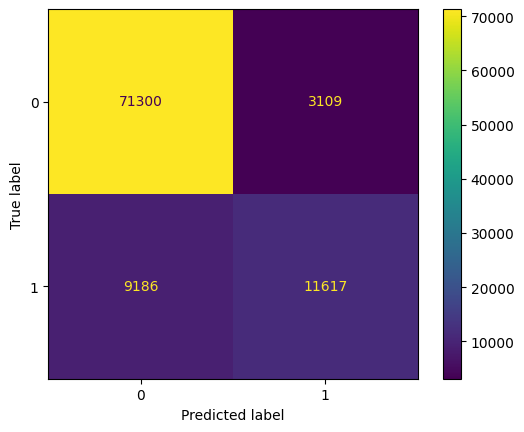

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     74409
           1       0.79      0.56      0.65     20803

    accuracy                           0.87     95212
   macro avg       0.84      0.76      0.79     95212
weighted avg       0.86      0.87      0.86     95212



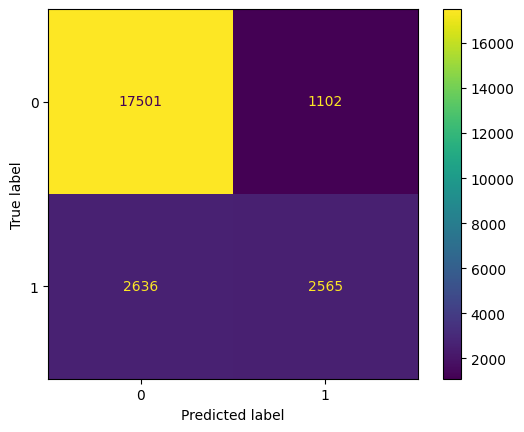

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     18603
           1       0.70      0.49      0.58      5201

    accuracy                           0.84     23804
   macro avg       0.78      0.72      0.74     23804
weighted avg       0.83      0.84      0.83     23804



(0.0592377573509649, 0.493174389540473)

In [21]:
#COMPLETAR
from f_func import fmatcon
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X_train, y_train)
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

from sklearn.metrics import classification_report

print('metricas en train')
print(classification_report(y_train, train_pred))
print('metricas en test')
print(classification_report(y_test, test_pred))

fmatcon(y_train,train_pred,clf)
fmatcon(y_test,test_pred,clf)


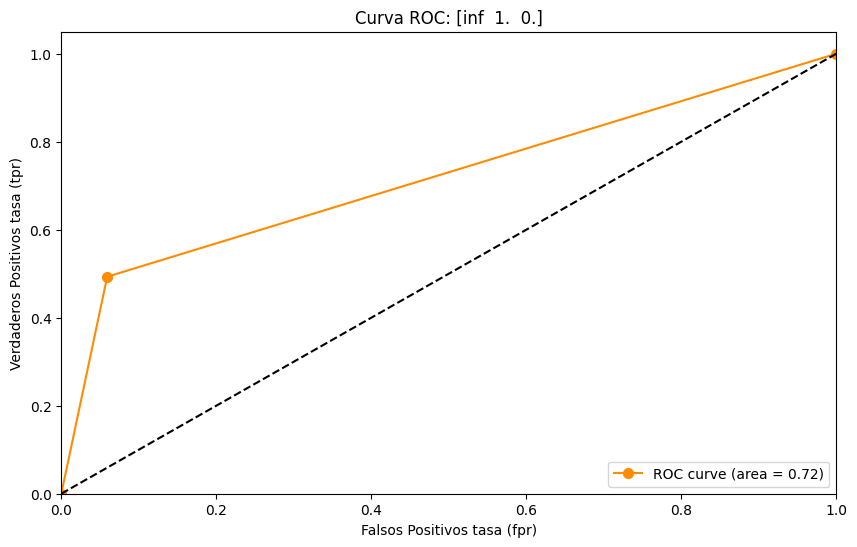

0.7169683160947541

In [22]:
#area bajo la curva roc sobre test

import numpy as np
from sklearn import metrics
from f_func import fplotROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred)

fplotROC(fpr,tpr,thresholds,'DarkOrange')

metrics.auc(fpr, tpr)


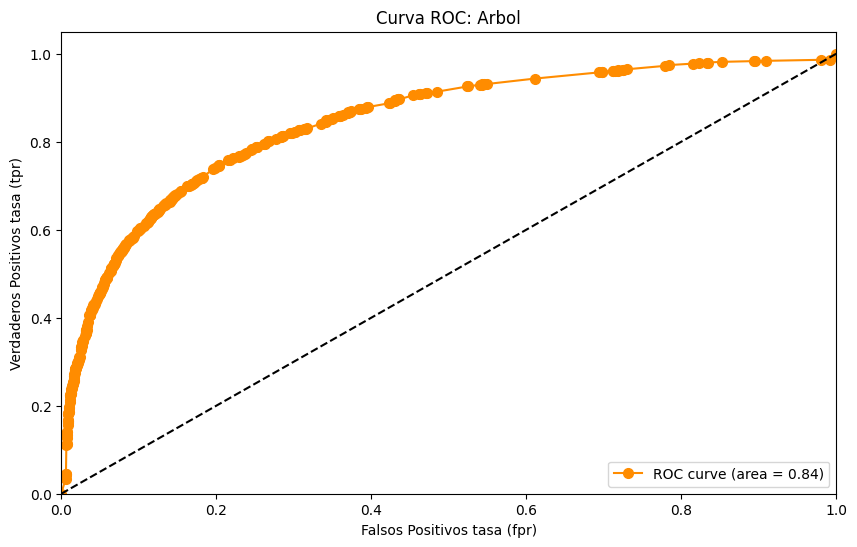

Umbral Optimo:0.1875, tpr 0.7473562776389155, fpr 0.20340805246465624


In [23]:
test_predP = clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_predP[:,1])

fplotROC(fpr,tpr,'Arbol','DarkOrange')

metrics.auc(fpr, tpr)

iumax=np.argmax(tpr-fpr)
umax=thresholds[iumax]
print(f'Umbral Optimo:{umax}, tpr {tpr[iumax]}, fpr {fpr[iumax]}')

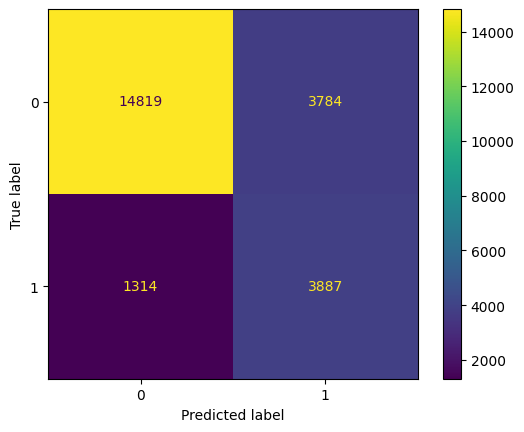

              precision    recall  f1-score   support

           0       0.92      0.80      0.85     18603
           1       0.51      0.75      0.60      5201

    accuracy                           0.79     23804
   macro avg       0.71      0.77      0.73     23804
weighted avg       0.83      0.79      0.80     23804



(0.20340805246465624, 0.7473562776389155)

In [24]:
test_predP_U=(test_predP[:,1]>=umax).astype(int)
fmatcon(y_test,test_predP_U,clf)

Ahora, usar un Bagging Classifier armado con árboles de decisión: 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

Los árboles que usemos en este clasificador, deberán tener la misma profundidad máxima (max_depth) que el árbol que entrenamos recién.

Además usar: 

- n_estimators = 200
- n_jobs = -1 -> ¿Qué pasa si sacamos esto?
- random_state = 0 -> En el arbol y en el BaggingClassifier

In [25]:
#COMPLETAR

from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(estimator = DecisionTreeClassifier(max_depth=10, random_state=0), n_estimators=100, n_jobs=-1, random_state=0)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('metricas para train')
print(classification_report(y_train, y_train_pred))
print('metricas para test')
print(classification_report(y_test, y_test_pred))

metricas para train
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     74409
           1       0.85      0.56      0.67     20803

    accuracy                           0.88     95212
   macro avg       0.87      0.76      0.80     95212
weighted avg       0.88      0.88      0.87     95212

metricas para test
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     18603
           1       0.76      0.50      0.60      5201

    accuracy                           0.86     23804
   macro avg       0.82      0.73      0.76     23804
weighted avg       0.85      0.86      0.84     23804



0.7287859525854395


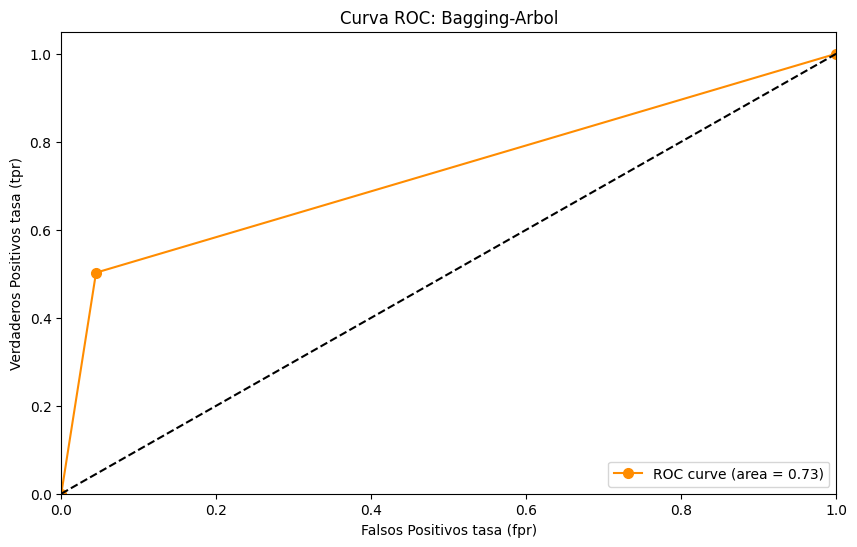

In [26]:
#metricas en test
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
print(metrics.auc(fpr, tpr))
fplotROC(fpr,tpr, 'Bagging-Arbol','darkorange')

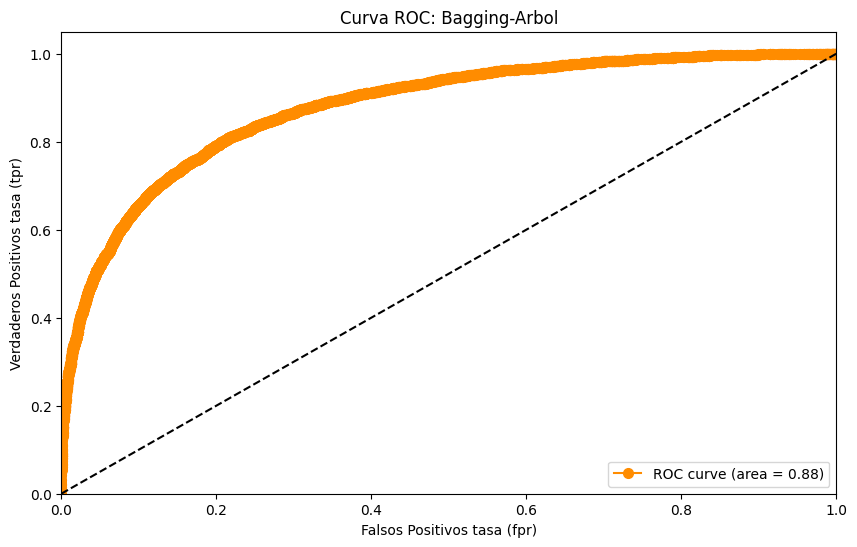

Umbral Optimo:0.19414776302114034, tpr 0.8084983656989041, fpr 0.2158254045046498


In [27]:
y_test_predP = clf.predict_proba(X_test)
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_test_predP[:,1])
fplotROC(fpr,tpr,'Bagging-Arbol','darkorange')
iumax=np.argmax(tpr-fpr)
umax=thresholds[iumax]
print(f'Umbral Optimo:{umax}, tpr {tpr[iumax]}, fpr {fpr[iumax]}')

Ahora, probar con un RandomForestClassifier. 

Los hiperparámetros serán igual que los anteriores:

- max_depth=10
- n_estimators=200
- n_jobs=-1
- random_state=0

In [28]:
%%time

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, n_estimators=100, n_jobs=-1, random_state=0, class_weight='balanced')
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
metrics.auc(fpr, tpr)

CPU times: total: 15.1 s
Wall time: 1.2 s


0.7882308792311586

In [29]:
print('metricas para train')
print(classification_report(y_train, y_train_pred))
print('metricas para test')
print(classification_report(y_test, y_test_pred))

metricas para train
              precision    recall  f1-score   support

           0       0.93      0.84      0.89     74409
           1       0.58      0.78      0.67     20803

    accuracy                           0.83     95212
   macro avg       0.76      0.81      0.78     95212
weighted avg       0.86      0.83      0.84     95212

metricas para test
              precision    recall  f1-score   support

           0       0.92      0.83      0.88     18603
           1       0.56      0.74      0.64      5201

    accuracy                           0.81     23804
   macro avg       0.74      0.79      0.76     23804
weighted avg       0.84      0.81      0.82     23804



Ahora, en el random forest, imprimir la importancia de las features:

In [30]:
#COMPLETAR
clf.feature_importances_

array([0.0280003 , 0.03050698, 0.09918242, 0.07074106, 0.01055339,
       0.01531183, 0.0801767 , 0.32532796, 0.06544008, 0.08143543,
       0.02098858, 0.0441765 , 0.0006302 , 0.00059033, 0.00061504,
       0.00423629, 0.00155631, 0.00189742, 0.00262082, 0.00181544,
       0.00114788, 0.00088237, 0.00107329, 0.00105202, 0.00152882,
       0.00122088, 0.00166239, 0.00121469, 0.04918083, 0.05523373])

Correr el siguiente código para obtener sus feature importances:

In [31]:
fi = pd.DataFrame(columns=["FEATURE", "IMPORTANCE"])
fi["FEATURE"] = X_train.columns
fi["IMPORTANCE"] = clf.feature_importances_
fi = fi.sort_values("IMPORTANCE", ascending=False)

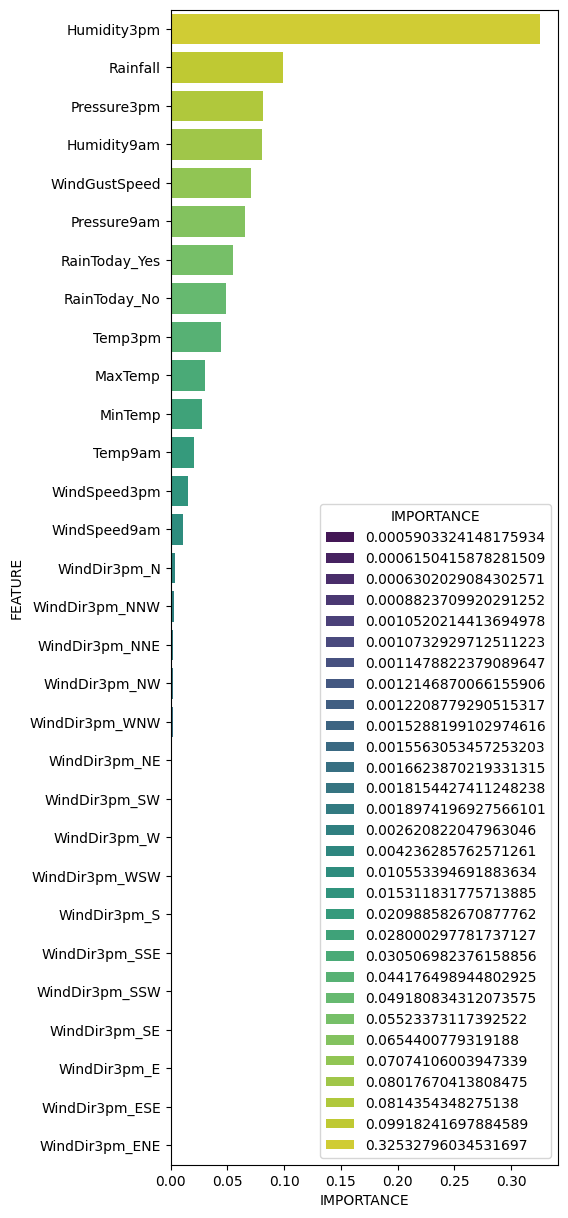

In [32]:
plt.figure(figsize=(5, 15))
# Crear una paleta de colores basada en 'viridis'
colors = sns.color_palette("viridis", n_colors=len(fi))

sns.barplot(y=fi.FEATURE, x=fi.IMPORTANCE, hue=fi.IMPORTANCE, palette=colors)
# plt.legend().set_visible(False)
plt.show()

Ahora, aplicar random forest en su proyecto del primer sprint.

Buscar los mejores hiperparámetros con grid search y finalmente imprimir el feature importance de las variables que utilizaron para entrenar.

In [36]:
dfd=pd.read_csv('tp1\diamantes2.csv')

In [37]:
dfd.head()

,quilates,corte,color,claridad,profundidad,mesa,precio,x,y,z,corte_ordinal,color_ordinal,claridad_ordinal
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5,22,4
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,22,5
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,18,6
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,17,4
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3,17,8


In [39]:
#Variables independientes o predictoras.
X = dfd[['quilates','profundidad','mesa','y','corte_ordinal','color_ordinal','claridad_ordinal']]
#Variable dependiente.
y = dfd['precio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor()
params={
    # 'n_estimators': [100,150,200],
    'max_depth': list(range(1,20)),
    # 'min_samples_split': list(range(1,10)),
    # 'min_samples_leaf': list(range(1,5)),
    # 'max_features': ['auto', 'sqrt', 'log2']
}
# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=rfr, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

Mejores hiperparámetros encontrados: {'max_depth': 13}


In [46]:
from sklearn.metrics import mean_squared_error, r2_score

rfr = RandomForestRegressor(max_depth= 20, max_features= 'log2', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
rfr.fit(X_train,y_train)

y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_test_pred)))))
print("R2  : {}".format(np.sqrt(r2_score((y_test),(y_test_pred)))))


RMSE: 444.7373409514874
R2  : 0.9914629862641503


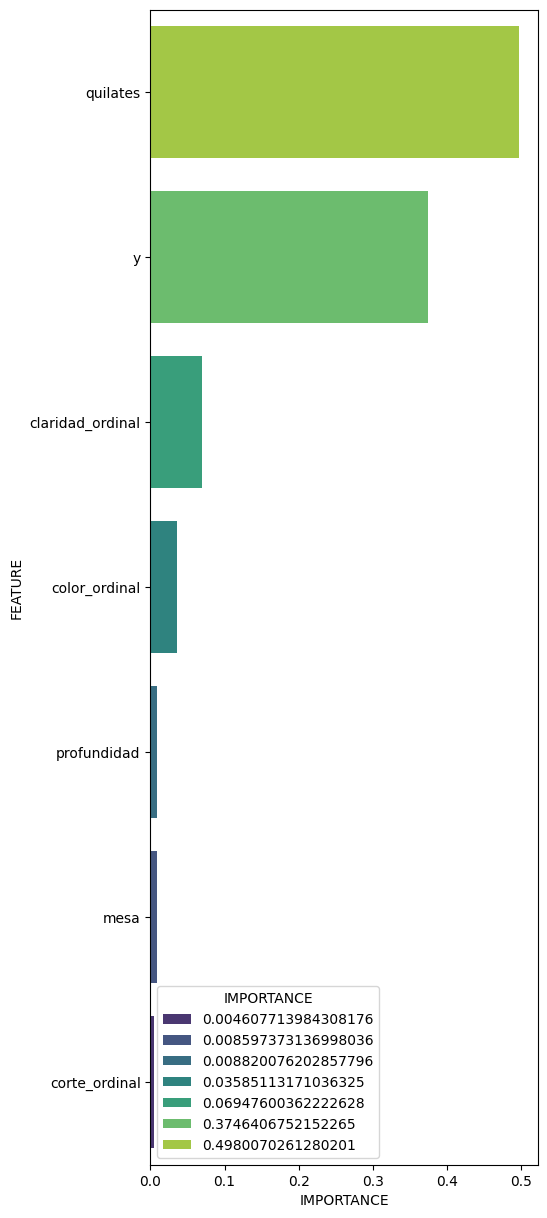

,FEATURE,IMPORTANCE
0,quilates,0.498007
3,y,0.374641
6,claridad_ordinal,0.069476
5,color_ordinal,0.035851
1,profundidad,0.008820
2,mesa,0.008597
4,corte_ordinal,0.004608


In [47]:
fimpovar(X_train,rfr,fig=(5,15))